In [6]:
import struct
import numpy as np
from sklearn import svm,metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
raw_train = read_idx("train-images.idx3-ubyte")
train_data=np.reshape(raw_train, (60000,28*28))
train_label=read_idx("train-labels.idx1-ubyte")

raw_test=read_idx("t10k-images.idx3-ubyte")
test_data=np.reshape(raw_test,(10000,28*28))
test_label=read_idx("t10k-labels.idx1-ubyte")

In [7]:
idx = (train_label == 2)|(train_label==3)|(train_label==8)
X=train_data[idx]/255.0
Y=train_label[idx]
svc=svm.SVC(C=5,gamma=0.05).fit(X,Y)

In [11]:
idx=(test_label==2)|(test_label==3)|(test_label==8)
X_test=test_data[idx]/255.0
Y_true=test_label[idx]
y_predict=svc.predict(X_test)


In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.99823789  0.          0.00176211]
 [ 0.          0.99490835  0.00509165]
 [ 0.00208768  0.00208768  0.99582463]]


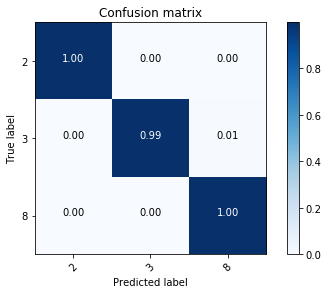

In [15]:
cm=metrics.confusion_matrix(Y_true,y_predict)
plot_confusion_matrix(cm,["2","3","8"],  normalize=True)

In [ ]:
idx=np.where((y_predict==2)&(Y_true==3))[0]
fig=plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax=fig.add_subplot(len(idx),1,i+1)
    imgplot=ax.imshow(np.reshape(X_test[idx[i],:],(28,28)),cmap=plt.cm.get_cmap('Greys'))
    imgplot.set_interpolation("nearest")
plt.show()